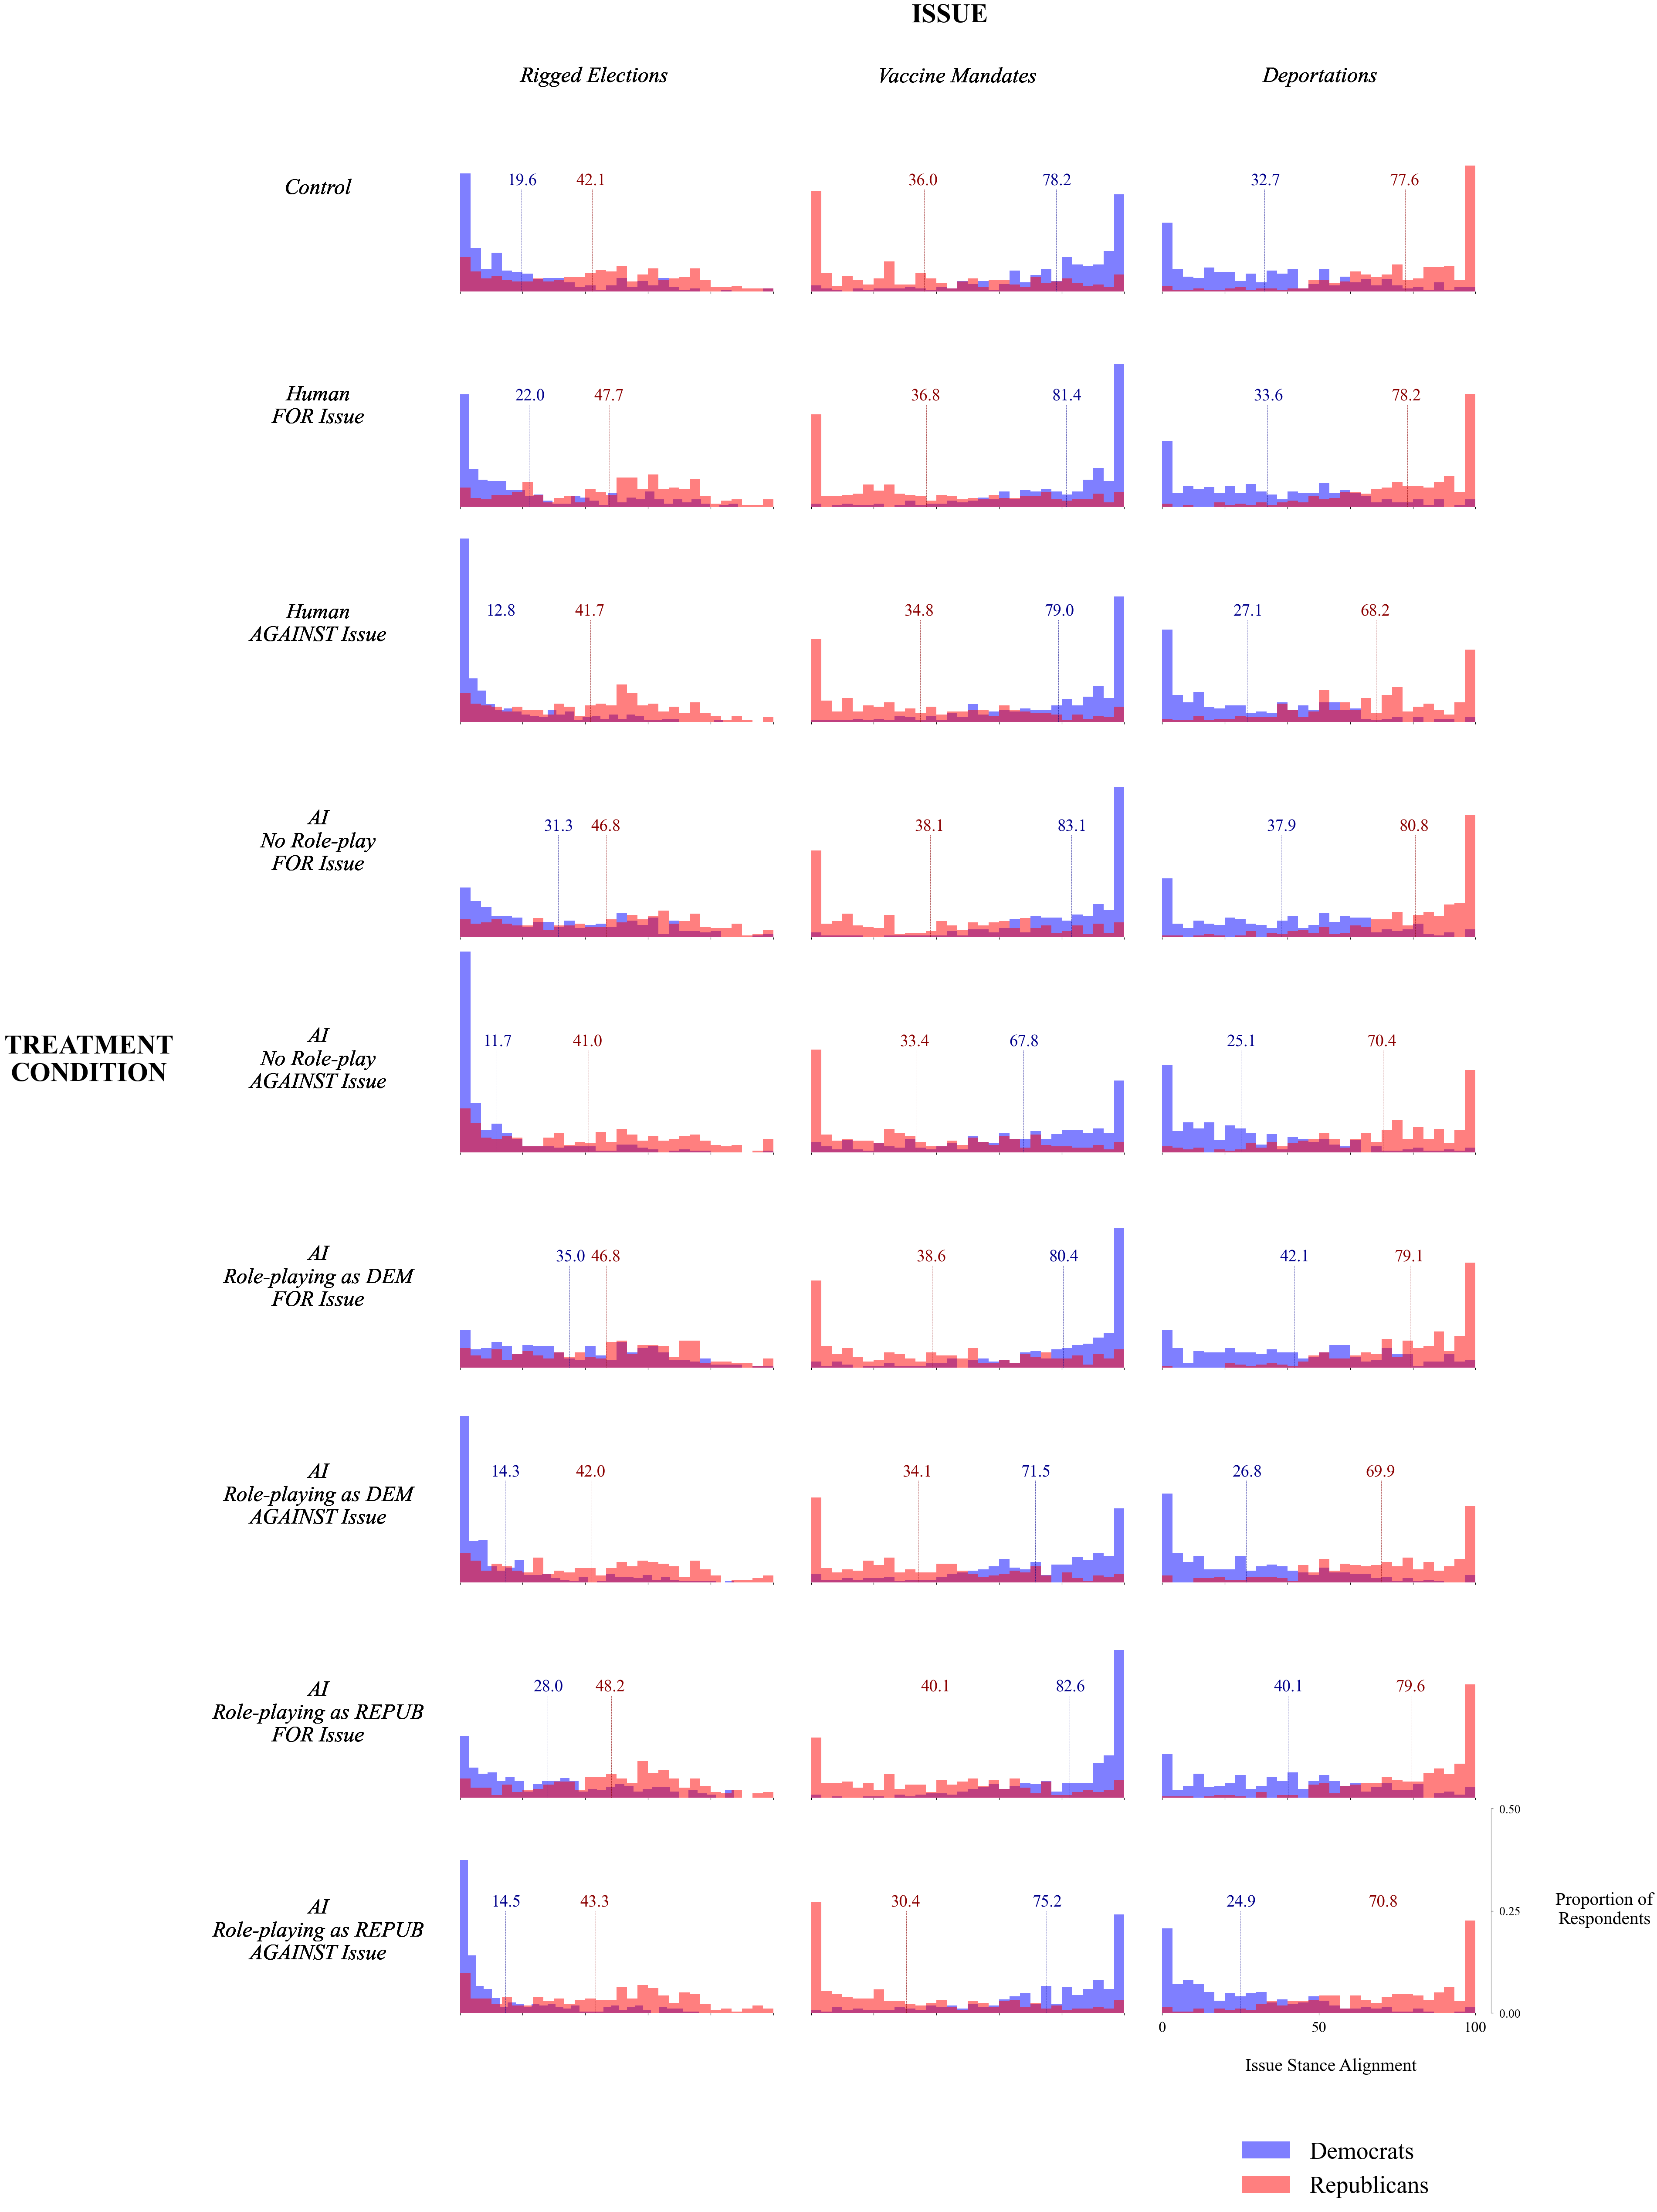

In [1]:
# ------------------------------
# FIG S1: DV RESPONSE / ISSUE POLARITY

# This code is used to generate the data for Figure S1 in the paper.
# ------------------------------

# Import libraries
import pandas as pd
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Read in data
df = pd.read_csv('../data/final_dataset.csv')

# Define a function to plot histograms
def plot_histogram(dataframe, column, title, ax, issue, condition):
    dems = dataframe[dataframe['party'] == 'dem'][column]
    repubs = dataframe[dataframe['party'] == 'repub'][column]
    
    weights_dems = np.ones_like(dems) / len(dems)
    weights_repubs = np.ones_like(repubs) / len(repubs)

    bins = 30

    ax.hist(dems, bins=bins, weights=weights_dems, color='blue', alpha=0.5, label='Dems')
    ax.hist(repubs, bins=bins, weights=weights_repubs, color='red', alpha=0.5, label='Repubs')

    ax.axvline(dems.mean(), ymin=0, ymax=0.5, color='darkblue', linestyle='dashed', linewidth=.5)
    ax.axvline(repubs.mean(), ymin=0, ymax=0.5, color='darkred', linestyle='dashed', linewidth=.5)

    ax.text(dems.mean()+5, ax.get_ylim()[1]/2 +.01, '{:.1f}'.format(dems.mean()), color='darkblue', ha='right', fontname='Times New Roman', fontsize=28)
    ax.text(repubs.mean()-5, ax.get_ylim()[1]/2 +.01, '{:.1f}'.format(repubs.mean()), color='darkred', ha='left', fontname='Times New Roman', fontsize=28)

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Only show y-axis for 'Deportations' issue and 'repub_against' condition
    if issue == 'Dep' and condition == 'repub_against':  
        ax.spines['right'].set_visible(True)
        ax.spines['right'].set_color('grey')
        ax.set_yticks([0, .25, .50])
        ax.tick_params(axis='y', labelsize=20)
        ax.yaxis.set_ticks_position('right')  # Set ticks on the right
        ax.yaxis.set_tick_params(pad=10)
    else:  # Hide y-axis for other issues and conditions
        ax.spines['right'].set_visible(False)
        ax.set_yticks([])

    # Only show x-axis labels for 'repub_against' condition and 'Deportations' issue
    if condition == 'repub_against' and issue == 'Dep':  
        ax.set_xticks([0, 50, 100])
        ax.tick_params(axis='x', labelsize=25, pad=10)
    else:  # Hide x-axis labels for other conditions and issues
        ax.set_xticklabels([])
    
    ax.set_title(title, fontname='Times New Roman', fontsize=20, weight='bold')
    return ax.get_legend_handles_labels()

# Set the order directly (elections, vaccine mandates, deportations)
cols_order = [
    'dv_response_mean_elec', 
    'dv_response_mean_vax', 
    'dv_response_mean_dep']

# Define the order for conditions
order = ['control', 'human_for', 'human_against', 'no role-play_for', 'no role-play_against', 'dem_for', 'dem_against', 'repub_for', 'repub_against']

unique_conditions = sorted(order, key=order.index)
num_conditions = len(unique_conditions)

# Plotting Preparation
plt.rcParams["font.family"] = "Times New Roman"

# Calculate the maximum y-value across all data
max_y = max(df[col].max() for col in cols_order)

# Create a larger figure to accommodate all subplots
fig, axes = plt.subplots(num_conditions, len(cols_order), figsize=(25,45))

for i, condition in enumerate(unique_conditions):
    condition_df = df[df['condition'] == condition]
    
    for j, col in enumerate(cols_order):
        ax = axes[i][j]
        ax.set_ylim(0, 0.5)  # Set y-axis limits

        issue = col.split('_')[-1].capitalize()
        
        if i == 0 and j == 0:  # Just capture the handles and labels from the first subplot
            handles, labels = plot_histogram(condition_df, col, "", ax, issue, condition)
        else:
            plot_histogram(condition_df, col, "", ax, issue, condition)

        
    # Add global labels for issues (columns)
    for j, col in enumerate(cols_order):
        issue = col.split('_')[-1]
        if issue == 'elec':
            issue = 'Rigged Elections'
        elif issue == 'vax':
            issue = 'Vaccine Mandates'
        elif issue == 'dep':
            issue = 'Deportations'
        fig.text(0.43/(len(cols_order)) + j/len(cols_order), 1.002, issue, ha='center', va='center', fontsize=36, style='italic')

    # Add global labels for conditions (rows)
    for i, condition in enumerate(unique_conditions):
        if condition == 'control':
            label = 'Control'
        elif condition == 'human_for':
            label = 'Human\nFOR Issue'
        elif condition == 'human_against':
            label = 'Human\nAGAINST Issue'
        elif condition == 'no role-play_for':
            label = 'AI\nNo Role-play\nFOR Issue'
        elif condition == 'no role-play_against':
            label = 'AI\nNo Role-play\nAGAINST Issue'
        elif condition == 'dem_for':
            label = 'AI\nRole-playing as DEM\nFOR Issue'
        elif condition == 'dem_against':
            label = 'AI\nRole-playing as DEM\nAGAINST Issue'
        elif condition == 'repub_for':
            label = 'AI\nRole-playing as REPUB\nFOR Issue'
        elif condition == 'repub_against':
            label = 'AI\nRole-playing as REPUB\nAGAINST Issue'
        fig.text(-.11, 0.9450 - i/num_conditions, label, ha='center', va='center', fontsize=36, style='italic')
        
# Create a global legend using the handles and labels captured
legend_fontsize = 12  # Adjust this for desired font size
legend_element_size = 40  # Adjust this for desired element size in the legend

# Edit the labels to change them from Dems --> Democrats and Repubs --> Republicans
labels = ['Democrats' if label=='Dems' else 'Republicans' if label=='Repubs' else label for label in labels]
fig.legend(handles, labels, bbox_to_anchor=(.93, -0.04), fontsize=legend_fontsize, prop={'size': legend_element_size}, frameon=False)

fig.text(.82, -.015, 'Issue Stance Alignment', ha='center', fontname='Times New Roman', fontsize=30)
fig.text(1.071, .06, 'Proportion of\nRespondents', ha='center', rotation=0, fontname='Times New Roman', fontsize=30)

fig.text(-0.32, .490, 'TREATMENT\nCONDITION', ha='center', fontname='Times New Roman', fontsize=44, weight='bold')
fig.text(.435, 1.033, 'ISSUE', va='center', rotation=0, fontname='Times New Roman', fontsize=44, weight='bold')  
    
# Adjust layout
plt.tight_layout()
plt.show()

fig.savefig('issue_polarity_by_condition.pdf', bbox_inches='tight')